In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import json

In [5]:
good_detail = json.load(open("item.json"))

# 京东商城商品评价数据分析结果展示

## 商品名称及url

In [6]:
'京东商品名称：%s \n链接：<a href="%s" target="_blank">%s</a><br>' % (
    good_detail.get('name'), good_detail.get('url'), good_detail.get('url')
)

'京东商品名称：中兴 Blade A3 3GB+32GB 静谧蓝 移动联通电信4G手机 人脸识别 双卡双待 \n链接：<a href="http://item.jd.com/6029342.html" target="_blank">http://item.jd.com/6029342.html</a><br>'

## 评价数量

In [7]:
import re

In [8]:
reg = re.compile(r"(\d+)(万)?(\+)?")

In [9]:
res = reg.search(good_detail.get('comment_count'))

In [10]:
res.groups()

('9500', None, '+')

In [11]:
def re_comment_count(num):
    import re
    reg = re.compile(r"(\d+)(万)?(\+)?")
    res = reg.search(num)
    if res and res.group(1):
        num = int(res.group(1))
        if res.group(2):
            num *= 10000
    return num

In [12]:
re_comment_count(good_detail.get('comment_count'))

9500

# 各种评论比率

In [13]:
comment_summary = good_detail.get('comment_desc')['productCommentSummary']

In [14]:
comment_summary['imageListCount'] = good_detail.get('comment_desc')['imageListCount']

In [15]:
# comment_summary series
cs_s = pd.Series(comment_summary)

In [16]:
cs_s

afterCount                  70
afterCountStr              70+
averageScore                 5
commentCount              9500
commentCountStr          9500+
defaultGoodCount          6500
defaultGoodCountStr      6500+
generalCount                60
generalCountStr            60+
generalRate              0.006
generalRateShow              1
generalRateStyle             1
goodCount                 9400
goodCountStr             9400+
goodRate                 0.987
goodRateShow                98
goodRateStyle              148
imageListCount             500
oneYear                      0
poorCount                   60
poorCountStr               60+
poorRate                 0.007
poorRateShow                 1
poorRateStyle                1
productId              6029342
showCount                  500
showCountStr              500+
skuId                  6029342
skuIds                    None
dtype: object

### 官方好评（三星及以上），中评，　差评率, 数量

In [17]:
official_comment_rate = cs_s[['goodCount', 'generalCount', 'poorCount']]

In [18]:
official_comment_rate.to_dict()

{'generalCount': 60, 'goodCount': 9400, 'poorCount': 60}

([<matplotlib.patches.Wedge at 0x7fe63dc51438>,
 [Text(-1.09914,0.0435486,'goodCount'),
  Text(1.09806,-0.0653016,'generalCount'),
  Text(1.09978,-0.0217787,'poorCount')])

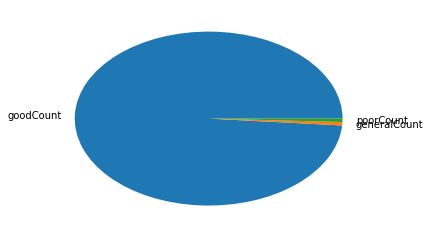

In [19]:
plt.pie(official_comment_rate, labels=official_comment_rate.index)

<Container object of 3 artists>

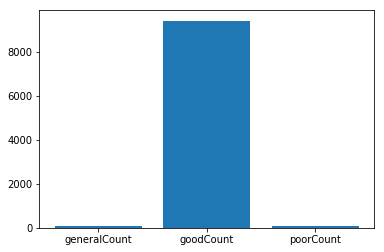

In [20]:
plt.bar(official_comment_rate.index, official_comment_rate)

In [21]:
import pyecharts

In [22]:
pie = pyecharts.Pie(title="官方评价比率图", subtitle="三星及以上为好评")

In [23]:
pie.add("", official_comment_rate.index, official_comment_rate)

In [24]:
pie

## 传统好评率

In [25]:
liquid = pyecharts.Liquid(title="传统好评率", subtitle='五星')
liquid.add("Liquid",  [cs_s['defaultGoodCount']/cs_s['commentCount']])
liquid

In [26]:
comment_num = cs_s[['generalCount', 'poorCount', 'imageListCount', 'afterCount']]

In [27]:
bar = pyecharts.Bar("各种评价数量")
bar.add("", comment_num.index, comment_num, mark_line=['max', 'min'], is_convert=True)
bar

#  前1000条评论分析

In [28]:
thousand_comment = good_detail.get('all_comments')

In [29]:
thousand_comment = pd.DataFrame(thousand_comment)

In [30]:
thousand_comment.head()

,afterDays,afterImages,afterUserComment,anonymousFlag,commentTags,content,creationTime,days,discussionId,firstCategory,...,userExpValue,userImage,userImageUrl,userImgFlag,userLevelColor,userLevelId,userLevelName,userProvince,videos,viewCount
0,0,NaN,NaN,1,NaN,外观漂亮，功能齐全反应速度快，支持国货,2018-02-10 10:24:01,21,NaN,9987,...,49335,storage.360buyimg.com/i.imageUpload/77656e7a68...,storage.360buyimg.com/i.imageUpload/77656e7a68...,1,#e1a10a,105,PLUS会员,,NaN,0
1,0,NaN,NaN,1,NaN,不错，中兴的机子，性价比挺高，质量值得信赖,2018-02-10 00:38:18,43,NaN,9987,...,87983,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#e1a10a,105,PLUS会员,,NaN,0
2,0,NaN,NaN,0,NaN,京东上买的第七部手机，同样是给朋友带的，3c产品京东没得说,2018-02-09 22:37:34,33,NaN,9987,...,28084,storage.360buyimg.com/i.imageUpload/cffeb7bc32...,storage.360buyimg.com/i.imageUpload/cffeb7bc32...,1,#e1a10a,105,PLUS会员,,NaN,0
3,0,NaN,NaN,1,NaN,快递很给力，东西已收到，还行吧，毕竟一分钱一分货,2018-02-09 22:11:34,1,326862121.0,9987,...,1845,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,61,银牌会员,,NaN,0
4,0,NaN,NaN,1,NaN,整体还行！第一次买中兴这牌子，不知道能用多久！,2018-02-09 22:09:49,0,326862438.0,9987,...,8333,storage.360buyimg.com/i.imageUpload/6a645f3739...,storage.360buyimg.com/i.imageUpload/6a645f3739...,1,#666666,61,银牌会员,,NaN,0


In [31]:
thousand_comment.index = pd.to_datetime(thousand_comment['creationTime'])
del thousand_comment['creationTime']

In [32]:
thousand_comment.head()

,afterDays,afterImages,afterUserComment,anonymousFlag,commentTags,content,days,discussionId,firstCategory,guid,...,userExpValue,userImage,userImageUrl,userImgFlag,userLevelColor,userLevelId,userLevelName,userProvince,videos,viewCount
creationTime,,,,,,,,,,,,,,,,,,,,,
2018-02-10 10:24:01,0,NaN,NaN,1,NaN,外观漂亮，功能齐全反应速度快，支持国货,21,NaN,9987,450a47e5-2036-4096-8aff-e1f59dededba,...,49335,storage.360buyimg.com/i.imageUpload/77656e7a68...,storage.360buyimg.com/i.imageUpload/77656e7a68...,1,#e1a10a,105,PLUS会员,,NaN,0
2018-02-10 00:38:18,0,NaN,NaN,1,NaN,不错，中兴的机子，性价比挺高，质量值得信赖,43,NaN,9987,6476b916-e445-4a48-8fe7-8feff1dbad7b,...,87983,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#e1a10a,105,PLUS会员,,NaN,0
2018-02-09 22:37:34,0,NaN,NaN,0,NaN,京东上买的第七部手机，同样是给朋友带的，3c产品京东没得说,33,NaN,9987,a93ea775-8ddd-4f84-9344-f72eefebdd2f,...,28084,storage.360buyimg.com/i.imageUpload/cffeb7bc32...,storage.360buyimg.com/i.imageUpload/cffeb7bc32...,1,#e1a10a,105,PLUS会员,,NaN,0
2018-02-09 22:11:34,0,NaN,NaN,1,NaN,快递很给力，东西已收到，还行吧，毕竟一分钱一分货,1,326862121.0,9987,63b3b8f7-02e3-47de-ac14-38d379be5301,...,1845,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,61,银牌会员,,NaN,0
2018-02-09 22:09:49,0,NaN,NaN,1,NaN,整体还行！第一次买中兴这牌子，不知道能用多久！,0,326862438.0,9987,22d86488-969e-41ea-af91-788c604e797e,...,8333,storage.360buyimg.com/i.imageUpload/6a645f3739...,storage.360buyimg.com/i.imageUpload/6a645f3739...,1,#666666,61,银牌会员,,NaN,0


In [33]:
thousand_comment.index

DatetimeIndex(['2018-02-10 10:24:01', '2018-02-10 00:38:18',
               '2018-02-09 22:37:34', '2018-02-09 22:11:34',
               '2018-02-09 22:09:49', '2018-02-09 21:19:41',
               '2018-02-09 20:11:42', '2018-02-09 19:37:57',
               '2018-02-09 17:36:09', '2018-02-09 16:28:39',
               ...
               '2018-02-26 18:49:19', '2018-02-26 18:40:46',
               '2018-02-26 16:20:40', '2018-02-26 16:19:24',
               '2018-02-26 16:17:58', '2018-02-26 15:34:51',
               '2018-02-26 15:19:22', '2018-02-26 15:00:45',
               '2018-02-26 14:44:27', '2018-02-26 14:01:50'],
              dtype='datetime64[ns]', name='creationTime', length=1000, freq=None)

## 每日评论数量统计

In [34]:
tc_time_comments_size = thousand_comment.to_period("d").groupby(level=0).size()

In [35]:
size_day_bar = pyecharts.Bar("每日评论数量统计")
size_day_bar.add("", tc_time_comments_size.index.to_timestamp(), tc_time_comments_size, is_datazoom_show=True)

In [36]:
tc_time_comments_size.index.to_datetime().strftime("%Y-%m-%d")

/home/he/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  """Entry point for launching an IPython kernel.


array(['2017-12-24', '2017-12-25', '2017-12-26', '2017-12-27',
       '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
       '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-

In [37]:
size_day_bar

## 星级分布

In [38]:
histogram_score = thousand_comment.groupby('score').size()

In [39]:
histogram_score

score
1     23
2      9
3     20
4     42
5    906
dtype: int64

In [40]:
score_bar = pyecharts.Bar("1000条数据星级分布图")
score_bar.add("", histogram_score.index, histogram_score, bar_category_gap=0)

In [41]:
score_bar

# 评论关键词分析

### 官方摘要

In [42]:
keyword_of_summary = good_detail['comment_desc'].get('hotCommentTagStatistics')
keyword_of_summary = pd.DataFrame(keyword_of_summary)[['name', 'count']]

In [43]:
keyword_of_summary

,name,count
0,物有所值,9
1,性价比高,6


In [44]:
official_wordcloud = pyecharts.WordCloud(width=980, height=620)
official_wordcloud.add("", keyword_of_summary['name'], keyword_of_summary['count'], word_size_range=[20, 100])

In [45]:
official_wordcloud

### 前1000条关键词

In [46]:
thousand_comment_content = thousand_comment['content']

In [47]:
thousand_comment_content

creationTime
2018-02-10 10:24:01                                  外观漂亮，功能齐全反应速度快，支持国货
2018-02-10 00:38:18                                不错，中兴的机子，性价比挺高，质量值得信赖
2018-02-09 22:37:34                        京东上买的第七部手机，同样是给朋友带的，3c产品京东没得说
2018-02-09 22:11:34                             快递很给力，东西已收到，还行吧，毕竟一分钱一分货
2018-02-09 22:09:49                              整体还行！第一次买中兴这牌子，不知道能用多久！
2018-02-09 21:19:41    帮别人代购的，目测质量挺好，配置高，作为备用机或老年机绝对够用了。作为配置党就是看着配置才推...
2018-02-09 20:11:42                                  还可以，就是下巴没有实体键还是长了点。
2018-02-09 19:37:57    昨天下单，今天晚上就到速度一流，快递小哥很热情讲解，谢谢！人脸识别很好用，几百块钱的手机上有...
2018-02-09 17:36:09                                        功能挺多，就是冲电有点慢，
2018-02-09 16:28:39    第三次购买中兴手机了，前两次购机使用两年左右，电池会损耗，好在中兴售后还不错，更换电池后给孩...
2018-02-17 12:15:38                                      用了这么久才来评价，超级好用呦
2018-02-17 12:13:10                             还行用的，第四次买这手机了，用的不错，速度还可以
2018-02-17 11:23:17                                           物流非常快，手机很好
2018-02-17 03:03:21                   

In [48]:
thousand_comment_content = "".join(thousand_comment_content)

In [49]:
thousand_comment_content

'外观漂亮，功能齐全反应速度快，支持国货不错，中兴的机子，性价比挺高，质量值得信赖京东上买的第七部手机，同样是给朋友带的，3c产品京东没得说快递很给力，东西已收到，还行吧，毕竟一分钱一分货整体还行！第一次买中兴这牌子，不知道能用多久！帮别人代购的，目测质量挺好，配置高，作为备用机或老年机绝对够用了。作为配置党就是看着配置才推荐的，好用不好用还不知道，习惯性好评。还可以，就是下巴没有实体键还是长了点。昨天下单，今天晚上就到速度一流，快递小哥很热情讲解，谢谢！人脸识别很好用，几百块钱的手机上有人脸识别不错，其他以后用了在说。以前用过中兴很好的老牌子功能挺多，就是冲电有点慢，第三次购买中兴手机了，前两次购机使用两年左右，电池会损耗，好在中兴售后还不错，更换电池后给孩子使用了。这次购机，主要看中本机电池容量和存贮空间大，以及插两张手机卡同时还能插一张SD卡。使用中，期待电池能满意。用了这么久才来评价，超级好用呦还行用的，第四次买这手机了，用的不错，速度还可以物流非常快，手机很好手机到手了，整体感觉还不错用着不错帮别人买的 她好喜欢  手感不错说实话，买这款手机之前我特意去百度和购物晒图、评论上看了好长时间，发现说好的不到四成，搞得我犹豫了几天，最后一想，不就几百元钱吗？买来试试。货到付款让我有了一点心理保障，拿到手机之后，外形和功能全都是我想要的，借此机会，我想送那些黑这款手机的人一句话：或许你的钱在你的世界里是英磅吧？最后，让我用这些天的使用心得来点个大赞运行速度和外观还都比较满意，加了一个32g的卡，这下存储就足够用了。一次比较满意的购物，给京东一个赞！手机买给老爸的，京东配送够快，大赞，至于手机好坏，相信不会太差，记得自己第一部智能手机7年前就是买的中兴。在外面买也就100多元的东西一直用中兴手机！用一段时间在评不错不错！京东服务就是好！快过年了还送货不知道电池怎样  觉得预装软件不能卸载完太好了，物流太给力了！好评多多支持京东，支持国货。此用户未填写评价内容还行吧，还可以，还很喜欢哟。还可以吧，给老爸买的，当老人机用，还支持面部解锁4000毫安时的中兴A3和3000毫安时荣耀畅玩5c使用时间基本相同，看来中兴在节电上做得不如华为。人脸识别不如指纹解锁快，形同虚设。手机触屏不太灵敏。总的来说还算可以，物有所值。最值得称道的是指纹解锁超好用，手湿点也没问题 ，这比我的荣

In [50]:
import jieba
wordlist_after_jieba = jieba.cut(thousand_comment_content)

In [51]:
wordlist_after_jieba

<generator object Tokenizer.cut at 0x7fe63da15780>

In [52]:
wl_space_split = " ".join(wordlist_after_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.064 seconds.
Prefix dict has been built succesfully.


In [53]:
from collections import Counter

In [54]:
keyword_count = [each for each in wl_space_split.split() if len(each)>1]
keyword_count = Counter(keyword_count)

In [55]:
keyword_count

Counter({'外观': 43,
         '漂亮': 19,
         '功能齐全': 7,
         '反应速度快': 3,
         '支持': 46,
         '国货': 14,
         '不错': 288,
         '中兴': 121,
         '机子': 9,
         '性价比': 83,
         '挺高': 2,
         '质量': 42,
         '值得': 31,
         '信赖': 14,
         '京东': 95,
         '第七': 1,
         '部手机': 4,
         '同样': 2,
         '朋友': 19,
         '3c': 1,
         '产品': 8,
         '没得说': 2,
         '快递': 34,
         '东西': 32,
         '收到': 49,
         '还行': 22,
         '毕竟': 10,
         '一分钱': 5,
         '一分货': 8,
         '整体': 15,
         '第一次': 14,
         '牌子': 2,
         '知道': 28,
         '多久': 2,
         '帮别人': 7,
         '代购': 1,
         '目测': 2,
         '配置': 14,
         '作为': 8,
         '备用机': 16,
         '老年': 4,
         '绝对': 7,
         '够用': 24,
         '就是': 66,
         '看着': 8,
         '推荐': 9,
         '好用': 40,
         '不好': 22,
         '习惯性': 3,
         '好评': 27,
         '可以': 159,
         '下巴': 3,
         '没有': 59,


In [56]:
keyword_count_s = pd.Series(keyword_count)

In [57]:
keyword_count_s = keyword_count_s[keyword_count_s>10]

In [58]:
keyword_count_s

4000       11
A1         11
hellip     22
一个         30
一次         19
一段时间       21
一点         15
一直         28
一般         19
下单         14
不卡         13
不好         22
不是         29
不能         12
不过         19
不错        288
东西         32
中兴        121
主要         16
京东         95
人脸识别       35
什么         18
今天         15
以后         15
价位         27
价格         38
价钱         15
但是         13
使用         46
便宜         16
         ... 
而且         16
耐用         25
耳机         18
自己         11
自营         12
视频         12
觉得         13
解锁         21
评价         53
质量         42
购买         25
购物         16
起来         25
超级         15
软件         11
运行         46
还好         16
还是         44
还有         17
还行         22
这个         57
这次         11
追评         13
送货         16
适合         12
速度         66
配置         14
配送         11
问题         21
非常         91
Length: 138, dtype: int64

In [59]:
thousand_wordcloud = pyecharts.WordCloud(width=980, height=620)
thousand_wordcloud.add("", keyword_count_s.index, keyword_count_s)

In [60]:
thousand_wordcloud

### 差评关键词

In [61]:
poor_comment = good_detail.get('poor_comments')

In [62]:
poor_df = pd.DataFrame(poor_comment)

In [63]:
poor_df

,afterDays,afterUserComment,anonymousFlag,content,creationTime,days,discussionId,firstCategory,guid,id,...,userExpValue,userImage,userImageUrl,userImgFlag,userLevelColor,userLevelId,userLevelName,userProvince,videos,viewCount
0,0,NaN,1,现在太差啦，第一次在京东买到这种货。居然不是金属后盖。中不会装什么都不会干。,2017-11-13 11:09:14,3,NaN,9987,bfa57054-214d-437d-82d2-9d63a51fe59f,10962473928,...,6156,storage.360buyimg.com/i.imageUpload/7764544f4f...,storage.360buyimg.com/i.imageUpload/7764544f4f...,1,#666666,61,银牌会员,,NaN,0
1,0,NaN,1,不好，，，，，不好用，，，，手机好坑,2017-11-13 10:42:20,2,NaN,9987,3d492d61-a226-432e-843d-eaadfe57abdd,10962303227,...,31910,storage.360buyimg.com/i.imageUpload/6a645f3434...,storage.360buyimg.com/i.imageUpload/6a645f3434...,1,#e1a10a,105,PLUS会员,,NaN,0
2,0,NaN,1,差评，明明写着不会比双十一贵，结果到了双十一就降了变成699，才五天就贵了一百块，他奶奶的还...,2017-11-12 08:49:11,6,282020801.0,9987,9e82b683-ddac-496b-8fb1-24c1d6432b7a,10956012459,...,35835,storage.360buyimg.com/i.imageUpload/6a645f3635...,storage.360buyimg.com/i.imageUpload/6a645f3635...,1,#e1a10a,105,PLUS会员,,NaN,0
3,0,NaN,1,做工粗糙，摄像头太次，这个价位有点儿不值。昨天又降了一百元，预约的人数五万多人可实际才有几百...,2017-11-12 05:38:00,6,NaN,9987,d6000746-bf3d-47f2-b53c-9216359666f3,10955632442,...,5553,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,62,金牌会员,,NaN,0
4,0,NaN,1,刚买两天就降价100，买之前问他双十一有优惠么，不说，真会做生意！！！,2017-11-11 23:10:23,4,NaN,9987,73864d64-cf3c-427a-bb3f-344214ecbb4f,10955152794,...,4428,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,61,银牌会员,,NaN,0
5,0,NaN,1,说句心里话，手机系统**的不要不要的，各种卡的黑屏，手机连一个出厂膜都没有，,2017-11-11 14:47:54,5,NaN,9987,f043302f-b751-49cf-a703-510e63dc1a65,10952669191,...,1175,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,56,铜牌会员,,NaN,0
6,0,NaN,1,刚买就降价，才用两天很多功能没试。,2017-11-11 14:47:00,3,NaN,9987,db8d1471-99b2-4048-9e80-8c876223eda6,10952666263,...,3116,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,61,银牌会员,,NaN,0
7,0,NaN,1,刚买回的机就降价了 无奈,2017-11-11 07:30:54,2,281159580.0,9987,00ca3e77-7041-431f-8c7b-c0f3c76ca9ea,10950755672,...,7318,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,62,金牌会员,,NaN,0
8,0,NaN,1,差评一下，不是手机不行，是我一下购了两件，一件有耳机，一件没有耳机，最后把有耳机的给了人家，...,2017-11-10 17:43:32,4,280885250.0,9987,3275b0d8-b77c-489f-8392-c8cd4c2eefbf,10948829948,...,2969,storage.360buyimg.com/i.imageUpload/6a645f3762...,storage.360buyimg.com/i.imageUpload/6a645f3762...,1,#666666,61,银牌会员,,NaN,0
9,0,NaN,1,不好用，卡的不能用,2017-11-09 13:20:49,3,NaN,9987,a82d81f6-a289-45aa-b13b-fa8c66b4a66c,10943872199,...,1250,misc.360buyimg.com/user/myjd-2015/css/i/peison...,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,#666666,56,铜牌会员,,NaN,0


In [64]:
poor_df_content = poor_df['content']

In [65]:
poor_content = "".join(poor_df_content)

In [66]:
poor_content

'现在太差啦，第一次在京东买到这种货。居然不是金属后盖。中不会装什么都不会干。不好，，，，，不好用，，，，手机好坑差评，明明写着不会比双十一贵，结果到了双十一就降了变成699，才五天就贵了一百块，他奶奶的还说买贵享受价格保护，可是一申请就说我这属于秒杀产品不在价保范围，他奶奶的亏我这么信任京东竟然狠狠把我耍了一把，套路太深了，不敢再相信他了做工粗糙，摄像头太次，这个价位有点儿不值。昨天又降了一百元，预约的人数五万多人可实际才有几百人的评价，可见水分不小。跟华为比起来还有一定差距。刚买两天就降价100，买之前问他双十一有优惠么，不说，真会做生意！！！说句心里话，手机系统**的不要不要的，各种卡的黑屏，手机连一个出厂膜都没有，刚买就降价，才用两天很多功能没试。刚买回的机就降价了  无奈差评一下，不是手机不行，是我一下购了两件，一件有耳机，一件没有耳机，最后把有耳机的给了人家，我自己留个没耳机的，这样办事几个意思。手机还可以。不好用，卡的不能用JD买了不到三天就降价！这些手机杂牌真是越来越坑了，要不是朋友要我才懒得买！必须差评！不差那几块钱了，让搞促销的拿去买药吧。以后不会买这个品牌的手机了，也不会叫朋友买或者帮朋友买，从此列入黑名单！！！！！！！699--799价格幅度升降太大了，不建议你们买！第一次发来的手机上不了卡，第二次换货的黑色手机，竟然来个黑白配&mdash;&mdash;真不知道玩的是什么，真是伤不起，还是到别人家店铺去买吧!今天为啥给他差评，中兴手机暂无评论。但京东商城太差劲，抢的A3手机10号才到手。结果光棍节就掉价100块，第二天找京东客户电话投诉，说重新下个订单，可12号又涨回来了。这不是忽悠抢手机的哪些人吗！既然是新手机又是饥饿营销的方式，在光棍节还降价促销。为何不给我们抢手机的补差价？？？出厂app太多没法删，还老是推送一些没有营养的消息，坑，手机好卡   不好用容易发热玩游戏很卡      屏幕很容易坏手机在这个价位还可以，预订购买的，几天后又降一百，还不能价保，京东这套把戏让人不齿，一星送京东。为了快才选择比涛包贵50的京东自营店，没想到竟然隔天没到一分钱一分货4核还是不够8的好用。快递很快连，连耳机也没有送非常不开心，双十一零点过买的，居然比八点过贵100，申请保价说是还没出库不能报价，等订单出库了，价格又涨回去了，这套路太深了。手机不错快

In [67]:
wordlist_after_jieba = jieba.cut(poor_content)

In [68]:
wl_space_split = " ".join(wordlist_after_jieba)

In [69]:
keyword_count = [each for each in wl_space_split.split() if len(each)>1]
keyword_count = Counter(keyword_count)
keyword_count_s = pd.Series(keyword_count)
keyword_count_s = keyword_count_s[keyword_count_s>2]
poor_wordcloud = pyecharts.WordCloud(width=980, height=620)
poor_wordcloud.add("", keyword_count_s.index, keyword_count_s)
poor_wordcloud

## 购买渠道

In [70]:
obj = thousand_comment['userClientShow']

In [71]:
obj

creationTime
2018-02-10 10:24:01     来自京东iPhone客户端
2018-02-10 00:38:18    来自京东Android客户端
2018-02-09 22:37:34     来自京东iPhone客户端
2018-02-09 22:11:34    来自京东Android客户端
2018-02-09 22:09:49    来自京东Android客户端
2018-02-09 21:19:41    来自京东Android客户端
2018-02-09 20:11:42                  
2018-02-09 19:37:57    来自京东Android客户端
2018-02-09 17:36:09            来自微信购物
2018-02-09 16:28:39    来自京东Android客户端
2018-02-17 12:15:38    来自京东Android客户端
2018-02-17 12:13:10    来自京东Android客户端
2018-02-17 11:23:17    来自京东Android客户端
2018-02-17 03:03:21     来自京东iPhone客户端
2018-02-17 01:00:01     来自京东iPhone客户端
2018-02-16 22:37:57    来自京东Android客户端
2018-02-16 21:41:34            来自微信购物
2018-02-16 13:47:29    来自京东Android客户端
2018-02-16 07:41:25     来自京东iPhone客户端
2018-02-15 22:33:52    来自京东Android客户端
2018-02-15 07:44:13            来自微信购物
2018-02-15 04:48:54            来自微信购物
2018-02-15 00:09:42    来自京东Android客户端
2018-02-14 23:41:07    来自京东Android客户端
2018-02-14 20:59:56     来自京东iPhone客户端
2018-02-14 19:21:10    来自京东Android客户端

In [72]:
obj = obj.value_counts()

In [73]:
obj

来自京东Android客户端    684
来自京东iPhone客户端     128
来自微信购物            106
                   61
来自手机QQ购物           20
来自京东iPad客户端         1
Name: userClientShow, dtype: int64

In [74]:
obj = obj.rename({'': '来自京东网页端'})

In [75]:
obj.to_dict()

{'来自京东Android客户端': 684,
 '来自京东iPad客户端': 1,
 '来自京东iPhone客户端': 128,
 '来自京东网页端': 61,
 '来自微信购物': 106,
 '来自手机QQ购物': 20}

## 移动端占比

In [76]:
obj = thousand_comment['isMobile']
obj = obj.value_counts()
obj = obj.rename({1: '移动端', 0: 'PC'})

In [77]:
obj

移动端    813
PC     187
Name: isMobile, dtype: int64

## 购买颜色分析

In [78]:
obj = thousand_comment['productColor']
obj = obj.value_counts()
obj

曜石黑    540
冰川蓝    314
静谧蓝    146
Name: productColor, dtype: int64

## 购买配置分析

In [79]:
obj = thousand_comment['productSize']
obj = obj.value_counts()

In [80]:
obj

移动联通电信4G手机    1000
Name: productSize, dtype: int64

## 购买者地域分析

In [81]:
obj = thousand_comment['userProvince']
obj = obj.value_counts()

In [82]:
obj = obj.rename({"": "用户不授权地理位置"})

In [83]:
obj

用户不授权地理位置    1000
Name: userProvince, dtype: int64

## 购买后多少天评价

In [84]:
obj = thousand_comment['days']

In [85]:
obj = obj.value_counts()

In [86]:
obj = obj.sort_index()

In [87]:
obj

0      22
1     173
2     129
3      71
4      48
5      41
6      28
7      26
8      20
9      24
10     24
11     14
12     12
13     17
14     13
15     18
16     23
17     13
18     14
19     10
20      8
21     10
22     10
23     13
24      4
25      7
26      2
27      5
28      6
29      7
     ... 
37      8
38      5
39      3
40      3
41      5
42      6
43      5
44      7
45      3
46     10
47      7
48      8
49      6
50      1
51      5
52      8
53      1
54      7
55      8
56      5
57      6
58      6
59      1
60      9
61      6
62      3
64      1
66      1
70      1
72      1
Name: days, Length: 67, dtype: int64

In [88]:
 if len(obj.index) > 20:
            value = obj[obj.index >= 20].sum()
            obj = obj.drop(obj[obj.index > 20].index)
            obj.values[-1] += value

In [89]:
obj

0      22
1     173
2     129
3      71
4      48
5      41
6      28
7      26
8      20
9      24
10     24
11     14
12     12
13     17
14     13
15     18
16     23
17     13
18     14
19     10
20    268
Name: days, dtype: int64

In [90]:
obj.index = [
    str(each)+"天" for each in obj.index
]

In [91]:
obj

0天      22
1天     173
2天     129
3天      71
4天      48
5天      41
6天      28
7天      26
8天      20
9天      24
10天     24
11天     14
12天     12
13天     17
14天     13
15天     18
16天     23
17天     13
18天     14
19天     10
20天    268
Name: days, dtype: int64

In [92]:
obj.rename({'0天': "当天"})

当天      22
1天     173
2天     129
3天      71
4天      48
5天      41
6天      28
7天      26
8天      20
9天      24
10天     24
11天     14
12天     12
13天     17
14天     13
15天     18
16天     23
17天     13
18天     14
19天     10
20天    268
Name: days, dtype: int64

In [93]:
if len(obj.index)>20:
    obj.rename({"20天": "20天后"})

## 用户会员等级

In [94]:
obj = thousand_comment['userLevelName']

In [95]:
obj = obj.value_counts()

In [96]:
obj

银牌会员          334
金牌会员          207
PLUS会员        184
铜牌会员          169
钻石会员           98
PLUS会员[试用]      8
Name: userLevelName, dtype: int64

In [97]:
obj.to_dict()

{'PLUS会员': 184,
 'PLUS会员[试用]': 8,
 '金牌会员': 207,
 '钻石会员': 98,
 '铜牌会员': 169,
 '银牌会员': 334}

## 24小时分布

In [98]:
obj = thousand_comment.index # 评价时间

In [99]:
obj = obj.hour
obj = obj.value_counts()
obj = obj.sort_index()

In [100]:
obj

0     18
1      7
2      6
3      4
4      3
5      3
6     14
7     22
8     46
9     50
10    49
11    72
12    62
13    56
14    53
15    57
16    47
17    65
18    64
19    60
20    79
21    65
22    61
23    37
Name: creationTime, dtype: int64

In [101]:
obj.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [102]:
obj = thousand_comment['referenceTime']

In [103]:
obj = pd.DatetimeIndex(obj)

In [104]:
obj

DatetimeIndex(['2018-01-20 08:47:46', '2017-12-29 00:01:13',
               '2018-01-07 19:14:37', '2018-02-08 11:21:59',
               '2018-02-09 09:15:13', '2017-12-20 10:17:44',
               '2018-02-04 11:33:33', '2018-02-08 13:03:32',
               '2018-02-03 21:42:27', '2018-02-08 21:41:15',
               ...
               '2018-02-08 23:17:41', '2018-02-23 15:17:06',
               '2018-02-25 12:03:21', '2018-02-25 13:33:46',
               '2018-01-02 09:17:44', '2018-02-24 06:08:24',
               '2018-02-25 14:54:04', '2018-02-25 17:13:56',
               '2018-02-19 20:28:54', '2018-02-23 18:43:39'],
              dtype='datetime64[ns]', name='referenceTime', length=1000, freq=None)

In [105]:
obj.hour

Int64Index([ 8,  0, 19, 11,  9, 10, 11, 13, 21, 21,
            ...
            23, 15, 12, 13,  9,  6, 14, 17, 20, 18],
           dtype='int64', name='referenceTime', length=1000)

In [106]:
obj.hour.value_counts().sort_index()

0     33
1     16
2      5
3      3
4      8
5      6
6     16
7     26
8     45
9     61
10    77
11    57
12    33
13    54
14    45
15    44
16    36
17    61
18    48
19    68
20    83
21    56
22    82
23    37
Name: referenceTime, dtype: int64

## 商品购买和评论 时间关系图

In [107]:
cre_obj = pd.Series(index=thousand_comment.index, data=1)

In [108]:
cre_obj = cre_obj.resample("M").sum()

In [109]:
cre_obj.fillna(0)

creationTime
2017-12-31    148
2018-01-31    483
2018-02-28    369
Freq: M, dtype: int64

## end

In [110]:
head =thousand_comment.sort_values(
            ['usefulVoteCount'], ascending=False
        ).head(1)[['usefulVoteCount', 'content']]

In [111]:
head.loc[1,1]

TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [1] of <class 'int'>

In [ ]:
head.loc[1].to_dict()